In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [3]:
insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [5]:
insurance.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
X    63 non-null int64
Y    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


Scatter Plot for insurance : 

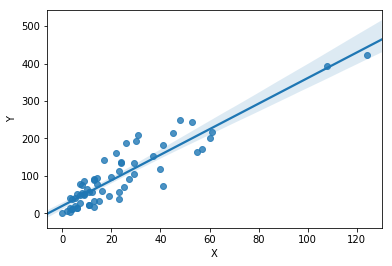

In [9]:
sns.regplot(x='X',y='Y',data=insurance)

This tutorial is broken down into five parts:

1) Calculate Mean and Variance.
2) Calculate Covariance.
3) Estimate Coefficients.
4) Make Predictions.
5) Predict Insurance.
These steps will give you the foundation you need to implement and train simple linear regression models for your own prediction problems.

## Calculate Mean and Variance 

In [1]:
# Estimate Mean and Variance
 
# Calculate the mean value of a list of numbers
def mean(values):
    sum_m = 0
    for i in values:
        sum_m += i
    return sum_m / len(values)
# Calculate the variance of a list of numbers
def variance(values, mean):
    sum_v = 0
    for i in values:
        sum_v += (i - mean) * (i - mean)
    return (sum_v) / len(values)
 
# calculate mean and variance
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=3.000 variance=2.000
y stats: mean=2.800 variance=1.760


## Calculate CoVariance

In [2]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    sum_v = 0.0
    for i in range(len(x)):
        sum_v += (x[i] - mean_x) * (y[i] - mean_y)
    return (sum_v) / len(x)
 
# calculate covariance
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
covar = covariance(x, mean_x, y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 1.600


## Estimate Coefficients 

In [12]:
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    mean_x, mean_y = mean(x), mean(y)
    var_x, var_y = variance(x, mean_x), variance(y, mean_y)
    covar = covariance(x, mean_x, y, mean_y)
    b1 = covar / var_x
    b0 = mean_y - b1 * mean_x
    return b0,b1
    
 
# calculate coefficients
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
b0, b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))


Coefficients: B0=0.400, B1=0.800


## Make Predictions

We will also add in a function to manage the evaluation of the predictions called evaluate_algorithm() and another function to estimate the Root Mean Squared Error of the predictions called rmse_metric()

In [23]:
from math import sqrt
 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    #TODO
    err = []
    for i in range(len(actual)):
        err.append(actual[i] - predicted[i])
        err[i] = err[i] * err[i]
    err_m = mean(err)
    return sqrt(err_m)

In [24]:
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

In [25]:
# Simple linear regression algorithm
def simple_linear_regression(train, test):
    #TODO
    b0 , b1 = coefficients(train)
    y = []
    for i in range(len(test)):
        y.append(b0 + b1 * test[i][0])
    return y

In [26]:
# Test simple linear regression
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


In [30]:
dataset[3:]

[[3, 2], [5, 5]]

## Now try on Insurance.csv

Change evaluate_algorithm(dataset, algorithm, split, *args) . In this function call train_test_split(dataset, split) . 

In [69]:
# Split a dataset into a train and test set
def train_test_split(dataset, split):
    #TODO try without scikit-learn
    import random
    random.shuffle(dataset)
    n = int(split * len(dataset))
    train = dataset[:n]
    test = dataset[n:]
    return train,test
    

In [70]:
# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
    train, test = train_test_split(dataset, split)
    test_set = list()
    for row in test:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(train, test_set, *args)
    actual = [row[-1] for row in test]
    rmse = rmse_metric(actual, predicted)
    return rmse

In [71]:
# evaluate algorithm
split = 0.7
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))

RMSE: 0.702
